        videoid        category_x          channel name  viewcount   likes  \
0   cA-O4oS-Wb8  Film & Animation              Nizzinny    2111239   19130   
1   AUzkqT1Gaos             Music           Mango Music  110654836  441900   
2   Ttl8246Jp18    People & Blogs         Moving Images      62063    1209   
3   mfqcRoldxO0    People & Blogs         Moving Images      38891    1310   
4   Bvp0iCbXnyQ    People & Blogs         Moving Images      83407    1198   
5   FBnB3IH_6Hk    People & Blogs         Moving Images      51768    1046   
6   6b2AGAB2pA0    People & Blogs      Eleonora Baglini     276252    2897   
7   XJCrR9HcH9Y            Comedy            Kanan Gill    2340309   56221   
8   S1xIsfnHcxc     Entertainment  Marvel Entertainment     240898   10473   
9   3-Xq_Zz3nPA  Film & Animation    Yuvan Shankar Raja    3004246  205430   
10  3-Xq_Zz3nPA  Film & Animation    Yuvan Shankar Raja    3004246  205430   
11  3-Xq_Zz3nPA  Film & Animation    Yuvan Shankar Raja    30042

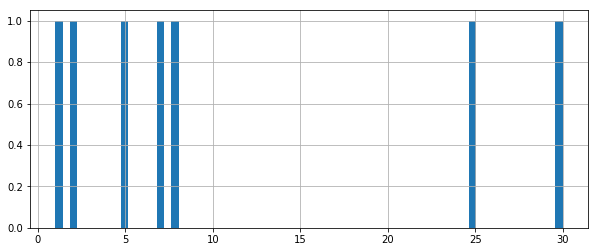

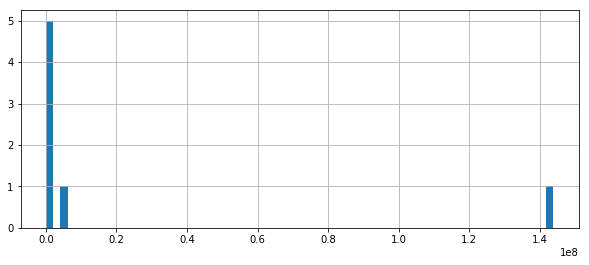

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
cat1 = pd.read_csv("/home/user/Categoryusers.csv")
cat1
category= pd.read_csv('/home/user/category.csv') 
category.head() 
category
data = pd.merge(cat1,category, on='videoid') 
print (data)
print (data.groupby('category_x')['viewcount'].count().sort_values(ascending=False).head()) 
suggest = pd.DataFrame(data.groupby('category_x')['viewcount'].mean())
suggest['num of suggestions'] = pd.DataFrame(data.groupby('category_x')['viewcount'].count()) 
suggest.head()
suggest.sort_values(by = ['num of suggestions'], ascending = False)
plt.figure(figsize =(10, 4)) 
suggest['num of suggestions'].hist(bins = 70) 
plt.figure(figsize =(10, 4)) 
suggest['viewcount'].hist(bins = 70) 
suggestion = data.pivot_table(index ='userid', 
              columns ='category_x', values ='viewcount') 
  
suggestion.head() 
  
print (suggest.sort_values('num of suggestions', ascending = False).head(10))
def excption_handle(x):
    try:
        # analysing correlation with similar videos 
        Music_user_viewcount = suggestion['Music'] 
        Entertainment_user_viewcount = suggestion['Entertainment'] 
        Music_user_viewcount.head() 
        # analysing correlation with similar videos
        similar_to_Music = suggestion.corrwith(Music_user_viewcount) 
        similar_to_Entertainment = suggestion.corrwith(Entertainment_user_viewcount) 
        corr_Music = pd.DataFrame(similar_to_Music, columns =['Correlation']) 
        corr_Music.apply(excption_handle).dropna().dropna(inplace = True) 
        # Similar videos like Music_category
        corr_Music = pd.DataFrame(similar_to_Music, columns =['Correlation']) 
        corr_Music.dropna(inplace = True) 
        corr_Music = corr_Music.join(suggest['num of suggestions']) 
        print (corr_Music[corr_Music['num of suggestions']>5].sort_values('Correlation', ascending = False).head() )
        # Similar videos like entertainment_category
        corr_Entertainment = pd.DataFrame(similar_to_Entertainment, columns =['Correlation']) 
        corr_Entertainment.dropna(inplace = True) 
        corr_Entertainment = corr_Entertainment.join(suggest['num of suggestions']) 
        corr_Entertainment[corr_Entertainment['num of suggestions']>5].sort_values('Correlation', ascending = False).head() 
    except ValueError:
        return None





In [17]:
def excption_handle(x):
    try:
        # analysing correlation with similar videos 
        Music_user_viewcount = suggestion['Music'] 
        Entertainment_user_viewcount = suggestion['Entertainment'] 
        Music_user_viewcount.head() 
        # analysing correlation with similar videos
        similar_to_Music = suggestion.corrwith(Music_user_viewcount) 
        similar_to_Entertainment = suggestion.corrwith(Entertainment_user_viewcount) 
        corr_Music = pd.DataFrame(similar_to_Music, columns =['Correlation']) 
        corr_Music.apply(x).dropna().dropna(inplace = True) 
    except ValueError:
        return None
       


In [18]:
corr_Music

,Correlation
category_x,
Comedy,-1.000000
Education,NaN
Entertainment,0.868138
Film & Animation,0.966050
Howto & Style,NaN
Music,1.000000
People & Blogs,NaN


In [20]:
# Similar videos like Music_category
corr_Music = pd.DataFrame(similar_to_Music, columns =['Correlation']) 
corr_Music.dropna(inplace = True) 
corr_Music = corr_Music.join(suggest['num of suggestions']) 
print (corr_Music[corr_Music['num of suggestions']>5].sort_values('Correlation', ascending = False).head() )

                  Correlation  num of suggestions
category_x                                       
Music                1.000000                  25
Film & Animation     0.966050                   8
Entertainment        0.868138                   7


In [21]:
# Similar videos like entertainment_category
corr_Entertainment = pd.DataFrame(similar_to_Entertainment, columns =['Correlation']) 
corr_Entertainment.dropna(inplace = True) 
corr_Entertainment = corr_Entertainment.join(suggest['num of suggestions']) 
corr_Entertainment[corr_Entertainment['num of suggestions']>5].sort_values('Correlation', ascending = False).head() 

,Correlation,num of suggestions
category_x,,
Entertainment,1.000000,7
Film & Animation,0.983507,8
Music,0.868138,25
